In [222]:
import copy
import math
import random

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# %matplotlib inline


def sphere(x):
    return sum(i ** 2 for i in x)


def rastrigin(x):
    return 10 * len(x) + sum(i ** 2 - 10 * math.cos(2 * math.pi * i) for i in x)


def rosenbrock(x):
    return sum(100 * (x[i + 1] - x[i] ** 2) ** 2 + (1 - x[i]) ** 2 for i in range(len(x) - 1))


def griewank(x):
    ret = 1 + 1 / 4000 * sum(i ** 2 for i in x)
    minus = 1
    for i in range(len(x)):
        minus *= math.cos(x[i] / math.sqrt(i + 1))
    ret -= minus

    return ret


def alpine(x):
    return sum(abs(i * math.sin(i) + 0.1 * i) for i in x)


def two_fact_minima(x):
    return sum(i ** 4 - 16 * i ** 2 + 5 * i for i in x)


w = 0.5
c = 1


def update_v(v, x, personal_best, global_best):
    r1 = random.random()
    r2 = random.random()
    return w * v + c * r1 * (personal_best - x) + c * r2 * (global_best - x)


def do_simulate(f, x_min, x_max):
    N = 100
    T = 100
    X = np.array([[random.uniform(x_min, x_max), random.uniform(x_min, x_max)] for _ in range(N)],
                 dtype="float64")
    V = np.array([[0, 0] for _ in range(N)], dtype="float64")
    personal_best = np.array([f(x) for x in X])
    personal_best_x = np.array([x for x in X])
    global_best = min(personal_best)
    global_best_x = copy.deepcopy(personal_best_x[personal_best.argmin()])
    global_bests = []

    fig = plt.figure(figsize=(25, 4))
    for t in range(T):
        for i in range(N):
            if f(X[i]) < personal_best[i]:
                personal_best[i] = f(X[i])
                personal_best_x[i] = copy.deepcopy(X[i])
            global_best_x = copy.deepcopy(personal_best_x[personal_best.argmin()])
            global_best = min(personal_best)
            V[i] = update_v(V[i], X[i], personal_best_x[i], global_best_x)
            X[i] += V[i]

        if t % int(T / 5) == 0:
            ax = fig.add_subplot(151 + t / int(T / 5), projection='3d')
            ax.set_xlim(x_min, x_max)
            ax.set_ylim(x_min, x_max)
            z = [f(x) for x in X]
            ax.set_zlim(min((min(z), 0)), max((max(z), 1.0)))
            ax.scatter(personal_best_x[:, 0], personal_best_x[:, 1], z)

        global_bests.append(global_best)
    fig = plt.figure()
    plt.plot(global_bests)
    print(f'最適値: {global_best}')
    print(f'最適値を取る(x, y): {global_best_x}')

最適値: 9.276348043082515e-32
最適値を取る(x, y): [-3.03046172e-16 -3.04384310e-17]


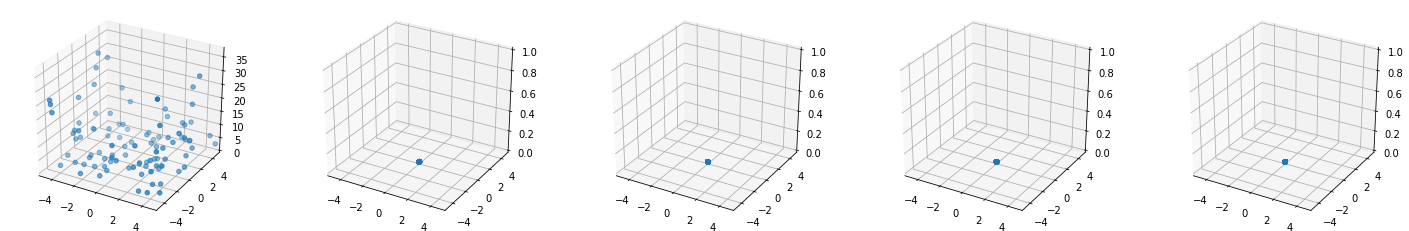

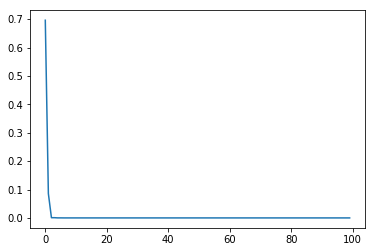

In [223]:
do_simulate(sphere, -5.0, 5.0)

最適値: 0.9949590570932898
最適値を取る(x, y): [-9.94958637e-01  2.07562344e-10]


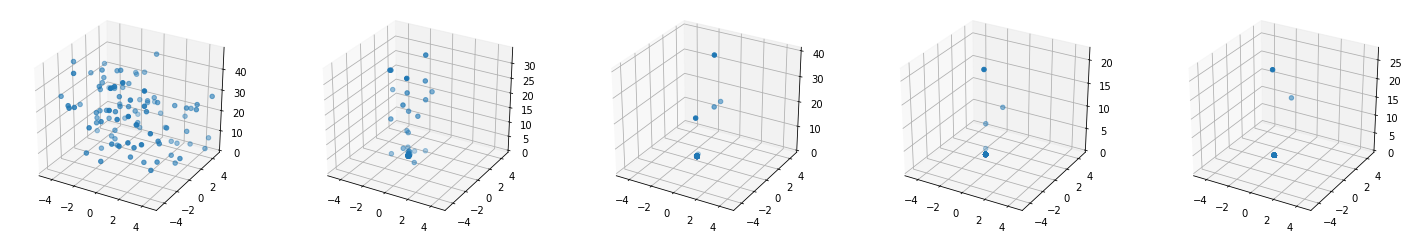

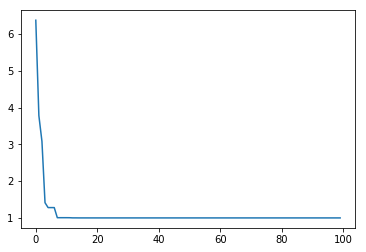

In [224]:
do_simulate(rastrigin, -5.0, 5.0)

最適値: 1.1482856551623353e-28
最適値を取る(x, y): [1. 1.]


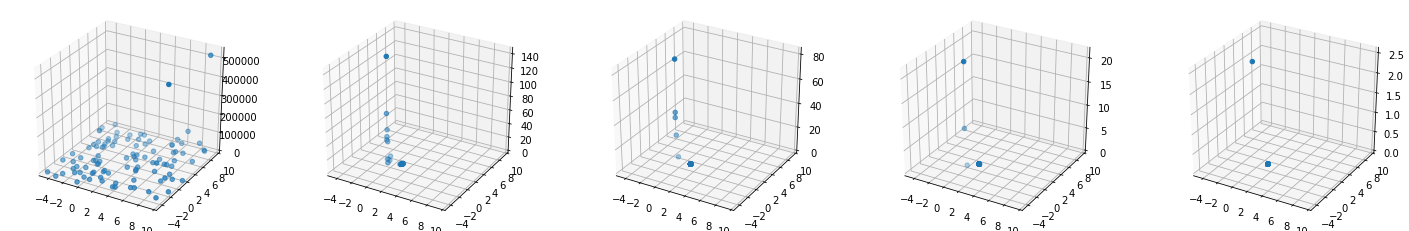

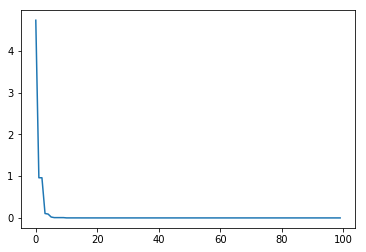

In [225]:
do_simulate(rosenbrock, -5.0, 10.0)

最適値: 0.0
最適値を取る(x, y): [8.30347646e-09 1.13504646e-09]


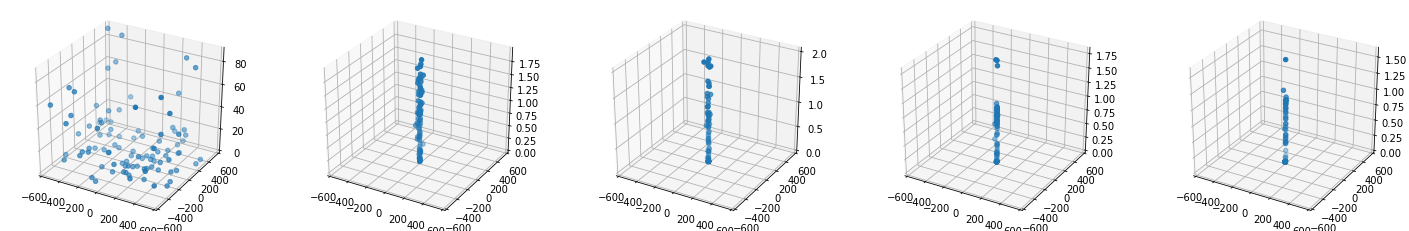

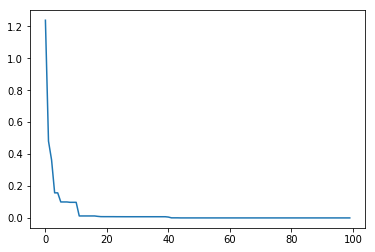

In [226]:
do_simulate(griewank, -600, 600)

最適値: 1.160530005428484e-15
最適値を取る(x, y): [-0.10016742 -0.10016742]


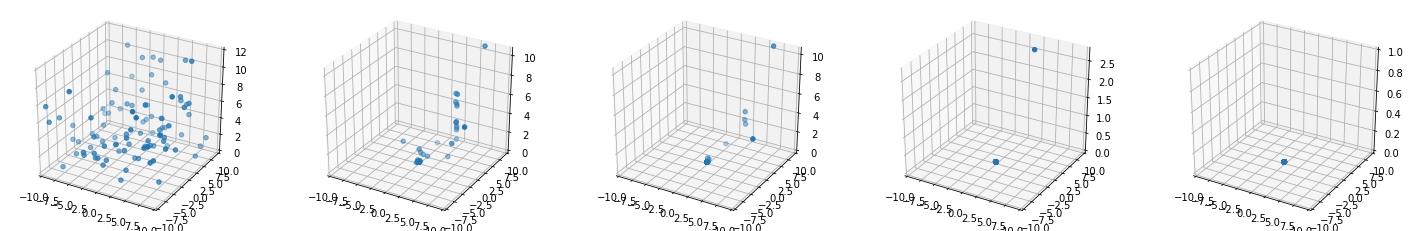

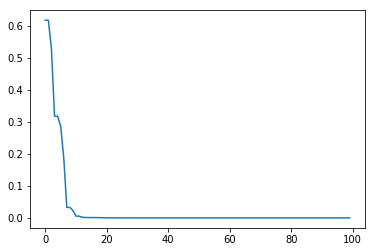

In [227]:
do_simulate(alpine, -10.0, 10.0)

最適値: -156.6646628150857
最適値を取る(x, y): [-2.90353402 -2.90353403]


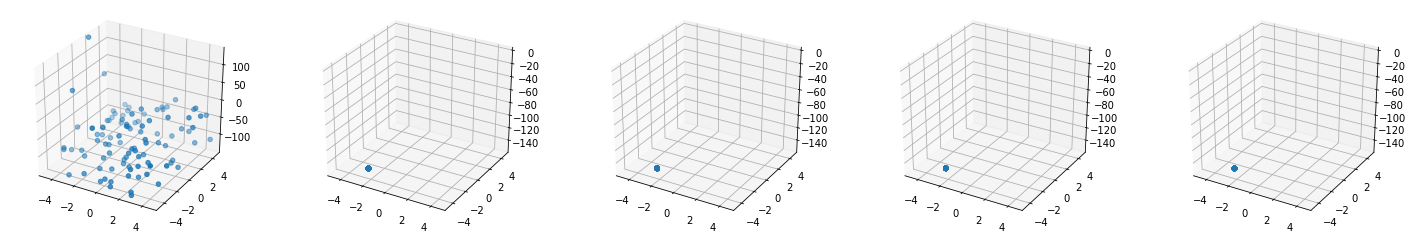

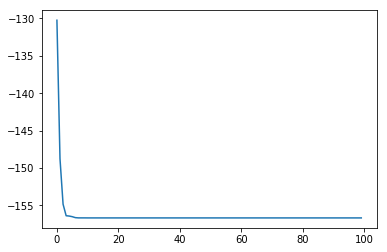

In [228]:
do_simulate(two_fact_minima, -5.0, 5.0)